In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/data.csv')
df=df.iloc[:,1:3]

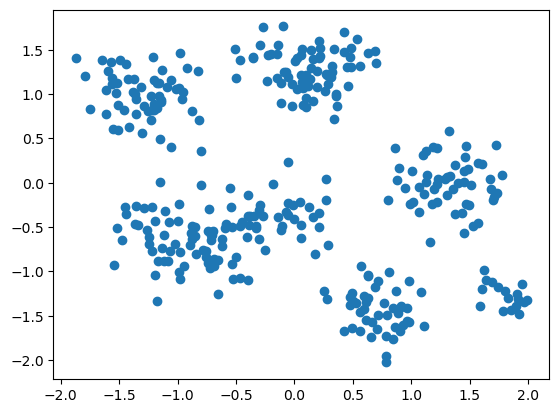

In [27]:
x=df.values
x=StandardScaler().fit_transform(x)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [168]:
class Spectralcluster:
    def __init__(self,n_cut,sigma,mode=0):
        self.n_cut=n_cut
        self.sigma=sigma
        self.mode=mode
    def fit(self,x):
        self.x=pairwise_distances(x)
        self.w=np.exp(-self.x/self.sigma)
        self.d=np.zeros(self.w.shape)
        for i in range(x.shape[0]):
            self.d[i,i]=np.sum(np.sort(self.w[i])[:-1])
        
        if self.mode==0:
            self.l=self.d-self.w
        elif self.mode==1:
            self.l=np.eye(self.w.shape[0])-np.linalg.inv(self.d)@self.w
        else:
            self.l=np.eye(self.w.shape[0])-np.linalg.inv(np.sqrt(self.d))@self.w@np.linalg.inv(np.sqrt(self.d))
        self.eigs=np.linalg.eig(self.l)[1]
        
#         for i in range(self.n_cut):
#             plt.scatter(range(x.shape[0]),self.eigs[:,i+1])
#             plt.show()
            
        return KMeans(n_clusters=self.n_cut).fit_predict(self.eigs[:,:self.n_cut+1])


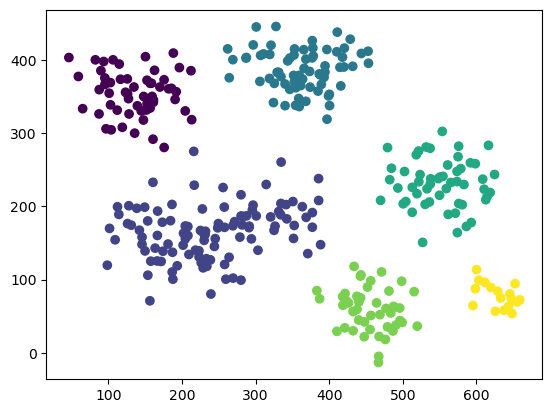

In [134]:
x=df.values
model=Spectralcluster(6,100)
predict=model.fit(x)

plt.scatter(x[:,0],x[:,1],c=predict)
plt.show()